# **Problemas**

Problemas que temos que resolver: 
*   Caso de vitoria em que o jogador não tem movimentos validos para serem feitos (Bloquear a movimentação do adversário).
*   Análise de jogadas válidas para cada peça.

Possiveis soluções(mudança de regras): 
Deixar o jogo rodar
 peças pularem as outras

*   Deixar o jogo rodar
*   Peças pularem as outras
*   Limitar quantidade maxima de rodadas.


 





#**Orthokon**



##*Tabuleiro vazio*

![](https://imgur.com/Wju6yfX.png)

**Fonte da Imagem:** https://www.educamaisbrasil.com.br/enem/educacao-fisica/xadrez

O tabuleiro padrão de Orthokon possui dimensão 4x4 e pode ser aumentado para tornar o jogo mais complexo, porém o aumento precisa ser proporcional.

##*Movimentos possíveis*

![](https://imgur.com/kjA1xrj.png)

**Fonte da Imagem:**http://jnsilva.ludicum.org/Obidos/orthokonpdf.pdf

As peças podem se mover na diagonal, horizontal ou vertical seguindo as seguintes regras:

* Apenas uma peça pode se mover por vez
* A peça só pode se mover em uma direção por rodada 
* A peça só pode parar de se mover quando encontra outra peça ou quando chega até a borda do tabuleiro
* Todas as peças ortogonais a peça que se movimentou devem adquirir a cor da peça que fez o movimento.

Exemplos de movimentos:
* **Diagonal:**

![](https://imgur.com/3hX2q2q.gif)

* **Horizontal:**

![](https://imgur.com/IiDvALk.gif)

* **Vertical:**

![](https://imgur.com/zSAZff9.gif)


**Fonte das Imagens Animadas:** Imagens elaboradas pelos autores com base no tabuleiro disponível em:
http://jnsilva.ludicum.org/Obidos/orthokonpdf.pdf
 

##*Condições de vitória*

 O jogador  vence a partida quando transforma todas as peças do seu adversario em suas peças, quando as peças do adversario ficam ortogonais a suas peças você transforma as peças dele em suas. abaixo temos um exemplo 

 O jogador amarelo moveu sua peça para casa, onde as peças vermelhas ficaram ortogonais, logo assim as peças vermelhas se tornaram amarelas, assim como mostra a outra imagem.


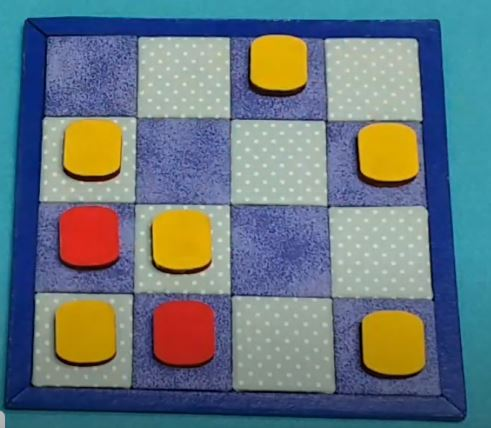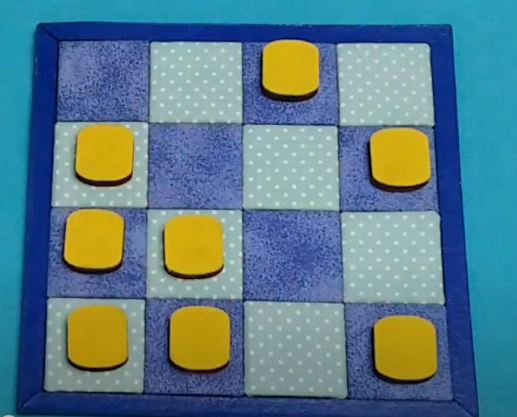

Outra forma de vencer é bloqueando a movimentação do adversário, se ele não puder mexer as peças dele você vence, abaixo temos um exemplo


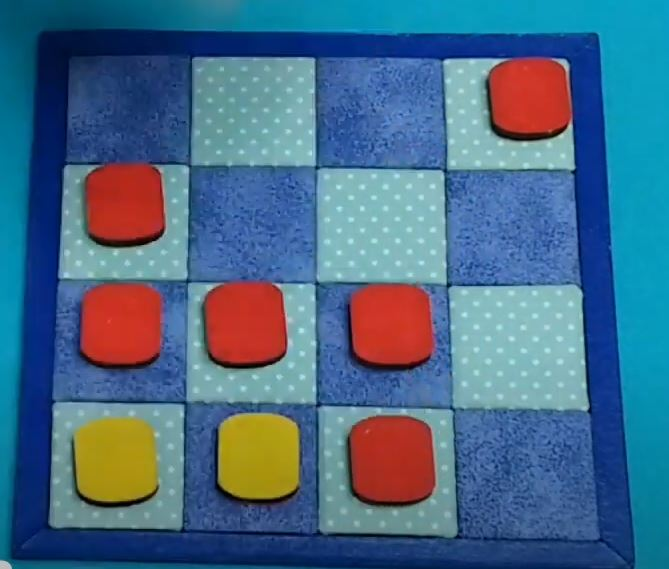

# Players


O jogador que inicia a partida será chamado de "1", o outro jogador será chamado de "-1".

Como no Orthokon as peças brancas começam, então o jogador que conduz as peças brancas será o jogador 1, enquanto que o jogador que conduz as peças pretas será chamado de -1.
Então, desde já , vamos assumir a seguinte regra:

*   **Peças Brancas**: 1
*   **Peças Pretas**: -1




# **Tabuleiro Orthokon**


O tabuleiro será representado por dois números e por um par de tuplas, uma delas contendo a listagem das peças **brancas** e a outra contendo a listagem das peças **pretas**. Os dois números anteriormente mencionados servem para definir as dimensões do tabuleiro, que serão fixadas previamente. A seguir, a representação de um possível tabuleiro:

**4, 4, ((1,1),(1,2),(1,3),(1,4)), ((4,1),(4,2),(4,3),(4,4))**

Nessa representação, temos um tabuleiro 4x4 onde as peças **brancas** estão nas casas (1,1),(1,2),(1,3) e (1,4), enquanto que as peças **pretas** estão na casa (4,1),(4,2),(4,3) e (4,4).

# **Representação Visual do Tabuleiro**


A função **draw_board**(lines, columns, white_positions, black_positions) recebe as configurações de um tabuleiro e imprime esse tabuleiro no kernel. Os parâmetros para essa função são explicados abaixo:

* **lines:** número de linhas no tabuleiro.

* **columns:** número de colunas no tabuleiro.

* **white_positions:** posição das peças brancas na forma de uma **tupla**.

* **black_positions:** posição das peças  pretas na forma de uma **tupla**.

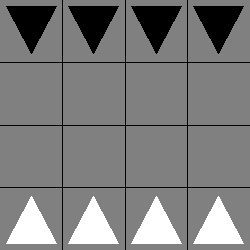

In [ ]:
from IPython.display import display # para mostrar imagens
from PIL import Image, ImageDraw    # para ler imagens

def draw_board(lines, columns,white_positions, black_positions) :
    board = Image.new('RGB', (250,250),  "gray") #Tamanho e a cor do tabuleiro.
    draw  = ImageDraw.Draw(board)
    
    ## Linhas e Colunas
    shift_lines = float(board.size[0])/lines    
    for el in range(lines) :
      #Desenhando linhas na Horizontal
        draw.line( (0, shift_lines *(el+1), board.size[0], shift_lines*(el+1)), fill = "black" )  
        
    ## Linhas e Colunas
    shift_columns = float(board.size[1])/columns
    for el in range(columns) :
      #Desenhando Linhas na Vertical
        draw.line( (shift_columns*(el+1), 0, shift_columns*(el+1), board.size[1]), fill = "black" )  #Linhas na Vertical
    
    ## Peças
    for el in black_positions :
        x, y = lines-el[0]+1, el[1]
        draw.polygon([(shift_columns*(y-0.9),shift_lines*(x-0.9)), 
                      (shift_columns*(y-0.5),shift_lines*(x-0.15)), 
                      (shift_columns*(y-0.1),shift_lines*(x-0.9))], 
                     fill = 'black')
        
    for el in white_positions :
        x, y = lines-el[0]+1, el[1]

        draw.polygon([(shift_columns*(y-0.9),shift_lines*(x-0.1)), 
                      (shift_columns*(y-0.5),shift_lines*(x-0.85)), 
                      (shift_columns*(y-0.1),shift_lines*(x-0.1))], 
                     fill = 'white')
    return board
  
  
board = draw_board(4,4,((1,1),(1,2),(1,3),(1,4)), ((4,1),(4,2),(4,3),(4,4)))  #Posicoes das peças Brancas e Pretas !!
display(board) #Exibir o tabuleiro


**Neste exemplo, vemos que o tabuleiro do Orthokon é dividido como uma matriz 4x4, onde temos linhas e colunas. Assim, temos uma peça branca na posição (1,1), que significa que ela está posicionada na linha 1, coluna 1 (line,col).**

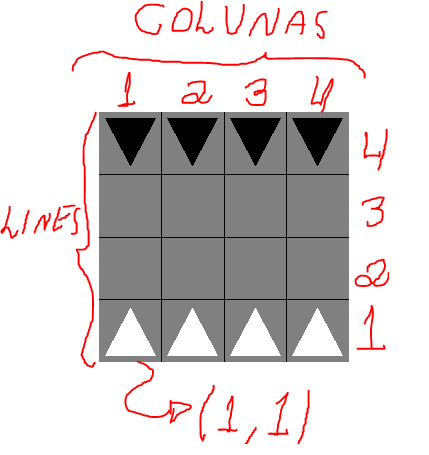

## Sequência de Jogadas

Será muito mais fácil para nós entendermos o jogo (e nos divertirmos) se tivermos uma maneira de animar uma partida inteira. Para isso, vamos criar uma forma interativa de permitir que o usuário veja a lista de movimentos.


In [ ]:
from ipywidgets import interact

def display_sequence(images) :
    def _show(frame=(0, len(images)-1)) :
        return images[frame]
    return interact(_show)

images = [
    draw_board(4,4,[(3,1),(1,2),(1,4)], [(4,2),(4,3),(4,4),(3,3),(2,4)] ),#Inicial
    draw_board(4,4,[(3,1),(3,2),(1,4),(4,2),(3,3)], [(4,3),(4,4),(2,4)] ),#Vez do branco
    draw_board(4,4,[(3,1),(3,2),(1,4),(4,2)], [(4,3),(3,4),(2,4),(3,3)] ),#Vez do Preto
    draw_board(4,4,[(3,1),(3,2),(2,3),(4,2),(2,4),(3,3)], [(4,3),(3,4)] ),#Vez do branco
    draw_board(4,4,[(3,1),(3,2),(2,3),(4,2),(2,4),(3,3)], [(4,3),(4,4)] ),#Vez do Preto
    draw_board(4,4,[(3,1),(3,2),(2,3),(4,2),(3,3),(4,4),(3,4)], [(4,3)] ),#Vez do branco
]
display_sequence(images)

interactive(children=(IntSlider(value=2, description='frame', max=5), Output()), _dom_classes=('widget-interac…

<function __main__.display_sequence.<locals>._show>

# **Implementando o Jogo**
Vamos começar a implementar o jogo propriamente dito, os passos serão:

* Representar as condições de vitória.
* Identificar as jogadas válidas (ações possíveis).

## Condições de Fim de Jogo
Em geral, podemos identificar duas condições em que uma partida pode ser finalizada:

1 - Se um jogador não possuir mais peças, ou seja, quando suas peças forem "coloridas" pelas peças adversárias

2 - Um jogador ficou impossibilitado de se mover, ou seja, suas peças ficaram cercadas por peças adversárias. (AINDA NÃO IMPLEMENTADA)

Em cada uma dessas situações, é possível identificar um dos jogadores como vencedor, lembrando que **1 representa o jogador das brancas** e **-1 representa o jogador das pretas.**

In [ ]:
def winner(lines, columns, white_positions, black_positions) :
    ## Se alguém ficou sem peças, encerrar a partida.
    if len(white_positions) == 0: #Vai contar quantos elementos tem na lista White_Position, se não tiver nenhum(0) significa que não tem peças brancas.
        print("Acabou para as brancas!") 
        return -1 #Quem ganhou foi o preto
    elif len(black_positions) == 0: #Vai contar quantos elementos tem na lista Black_Position, se não tiver nenhum(0) significa que não tem peças Pretas.
         print("Acabou para as pretas!") 
         return 1 #Quem ganhou foi a branca
   # elif valid_move(lines, columns, white_positions, black_positions) == True: #Significa que o jogador não tem mais movimentos válidos
     # return 2
    ## Jogo ainda não acabou
    else:
      print("O jogo não acabou")
      return 0

In [ ]:
## Exemplo de uso do que temos até agora.
winner(0, 0, (()), ((1,2))) #Exemplo de quando as brancas perdem (Quando não há elementos em sua tupla)
winner(0, 0, ((1,2)), (())) #Exemplo de quando as pretas perdem (Quando não há elementos em sua tupla)
winner(0, 0, ((1,1)), ((3,2))) #O jogo ainda não acabou, existe peças pretas e brancas no tabuleiro!


Acabou para as brancas!
Acabou para as pretas!
O jogo não acabou


0

##*Jogadas Válidas*
Vamos agora criar uma função chamada valid_move. O que ela faz é bastante simples, obtém um tabuleiro com peças brancas e pretas e verifica se um determinado movimento das brancas é válido ou não. Note que nos preocupamos apenas com a movimentação das brancas, isto ficará claro mais adiante, vamos assumir agora que iremos criar apenas o jogador das brancas e um jogador humano assumirá o controle das peças pretas.

A função valid_move(move, lines, columns, white_positions, black_positions) possui a maioria dos argumentos semelhantes ao que já explicamos para draw_board, exceto pelo primeiro, que é o movimento em si. Caso o movimento das brancas seja válido, a função devolve True. Caso contrário, devolve False.

In [ ]:
def valid_move(move, lines, columns, white_positions, black_positions) :
    ## Se não houver move (Movimentação das peças brancas), então já saia.
    if not move :
        return False
                            ##Move é duas tuplas, um origem e um destino.
    origem, destino = move #Vai vir uma tupla com origem e destino. Exemplo: ((1,1),(2,1)) - Sai da posição 1,1 e vai para a 2,1
    
    ## verificar limites do tabuleiro
    if not 0 < origem[0]  <= lines :
        return False
    if not 0 < destino[0] <= lines :
        return False
    if not 0 < origem[1]  <= columns :
        return False
    if not 0 < destino[1] <= columns :
        return False

    ## Verificar se origem é válida, se ele realmente é uma peça branca ele deve estar com seus valores dentro da duple white_positions.
    if not origem in white_positions :
        return False
      
    ## Verificar se destino é livre de peças brancas
    if destino in white_positions :
        return False
    if destino in black_positions :
        return False
    
    ##Verificar se o movimento foi máximo, ou seja, ele andou todas as casas possíveis.

    ##Não Deixar pular peças 
    
    return True

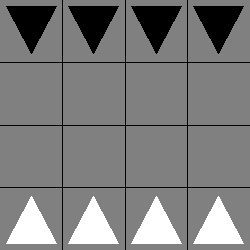

True
True
False
False
False
True
DIAGONAL --
False
p/ tras --
True
True
False
False


In [ ]:
board = draw_board(4,4,((1,1),(1,2),(1,3),(1,4)), ((4,1),(4,2),(4,3),(4,4))) 
display(board)                             #white                         #black
print(valid_move([(1,1),(2,1)],       4,4,((1,1),(1,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(4,4)) )) ## True
print(valid_move([(1,1),(2,2)],       4,4,((1,1),(1,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(4,4)) )) ## True
print(valid_move([(1,1),(2,0)],       4,4,((1,1),(1,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(4,4)) )) ## False Limite do tabuleiro (y=0)
print(valid_move([(1,1),(3,1)],       4,4,((1,1),(1,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(3,1)) )) ## False (Existe preta no 3,1)
print(valid_move([(2,2),(3,1)],       4,4,((1,1),(1,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(4,4)) )) ## False (Não está na origem!!)
print(valid_move([(2,2),(3,2)],       4,4,((2,2),(1,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(4,4)) )) ## True
print("DIAGONAL --")
print(valid_move([(2,2),(4,4)],       4,4,  ((1,1),(2,2),(1,3),(1,4)),    ((4,1),(4,2),(4,3),(4,4)) )) #False já tem peça nessa posição
print("p/ tras --")
print(valid_move([(2,2),(1,1)],       4,4,  ((2,2),(1,3),(1,4)),      ((4,1),(4,2),(4,3),(4,4)) )) #True (da 2,2 para 1,1)
print(valid_move([(2,2),(4,2)],       4,4,  [(2,2),(1,2),(1,3),(1,4)],    [(3,2),(4,1),(4,3),(4,4)])) ## False -> jump
print(valid_move([(2,2),(1,2)],       4,4,  [(1,1),(1,2),(1,3),(1,4)],    [(4,1),(4,2),(4,3),(4,4)])) ## False -> backward
print(valid_move([(2,2),(2,1)],       4,4,  [(1,1),(1,2),(1,3),(1,4)],    [(4,1),(4,2),(4,3),(4,4)])) ## False -> sideway

Podemos agora implementar a função get_valid_moves de uma maneira bastante simplificada, bastará selecionar todas as possíveis jogadas e eliminar as que não são válidas. Novamente, vamos supor que estamos criando um jogador para as peças brancas, as pretas serão conduzidas pelo jogador humano.

In [ ]:
def get_valid_moves(lines, columns, white_positions, black_positions) :
    valid_moves = []
    for origem in white_positions :
        destinos = ( 
            (origem[0]+1, origem[1]-1), 
            (origem[0]+1, origem[1]),                    
            (origem[0]+1, origem[1]+1)
        )
        for destino in destinos :    
            if valid_move( (origem, destino), lines, columns, white_positions, black_positions) :
               valid_moves.append(  (origem, destino)  )
    return tuple(valid_moves)

In [ ]:
tabuleiro = [4,4,((3,1),(1,2),(1,4)), ((4,2),(4,3),(4,4),(3,3),(2,4))]

get_valid_moves(*tabuleiro)

(((3, 1), (4, 1)),
 ((1, 2), (2, 1)),
 ((1, 2), (2, 2)),
 ((1, 2), (2, 3)),
 ((1, 4), (2, 3)))

## Efetuando Jogadas

Supondo que queremos criar um **bot**, o que ele precisa saber? Obviamente ele precisa saber quais são as jogadas válidas e qual peças ele está conduzindo. Basta isso para criarmos um jogador sem nenhum tipo de inteligência, que escolha ao acaso uma jogada dentre todas as disponíveis.

Se quisermos que o jogador tenha algum tipo de inteligência, provavelmente ele precisará de uma função que possibilite a pontuação dos tabuleiros. Essa função receberá um determinado tabuleiro e dará uma nota para o tabuleiro, uma espécie de **score**, quanto maior o **score** do tabuleiro, melhor ele é segundo a função de pontuação. 

A seguir, vamos tentar uma primeira implementação e depois podemos reformular o nosso jogador para que tenha algum tipo de inteligência.

In [ ]:
## O nosso jogador fará uma jogada ao acaso, então usamos 
## a biblioteca random para poder gerar números aleatórios
import random

## A função abaixo é um jogador. Ele receberá um tabuleiro
## como parâmetro pelas variáveis  lines, columns, white_positions, 
## black_positions. 
def player(lines, columns, white_positions, black_positions) :
    valid_moves = get_valid_moves(lines, columns, white_positions, black_positions)
    if valid_moves :
        return random.choice(valid_moves)
     
## O jogador retornará a peça que irá mover no 
## tabuleiro, seguida da posição no tabuleiro onde
## deverá colocar a peça. 
tabuleiro = [4,4, ((1,1),(1,2),(1,3),(1,4)), ((4,1),(4,2),(4,3),(4,4)) ]
player(*tabuleiro)

((1, 3), (2, 3))

## Adicionando Jogador Humano

Agora que temos um jogador para as peças brancas, vamos criar um jogador para as peças pretas. Esse jogador será um ser humano que fonecerá as jogadas pelo teclado. 

Vamos assumir que o jogador humano não comete erros, em outras palavras, não vamos fazer nenhum tipo de checagem para as jogadas feitas por essa pessoa.

In [ ]:
def human_player(lines, columns, white_positions, black_positions) : 
    board = draw_board(lines, columns, white_positions, black_positions)  
    display(board)   
    print("Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' ")
    origem, destino = eval(input())
    return origem, destino

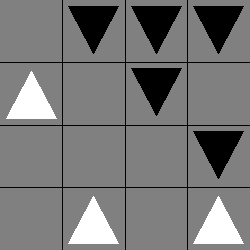

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(1,2),(2,2)


((1, 2), (2, 2))

In [ ]:
tabuleiro = [ 4,4,((3,1),(1,2),(1,4)), ((4,2),(4,3),(4,4),(3,3),(2,4)) ]

human_player(*tabuleiro )

## Gerenciador de Jogo

Temos um tabuleiro, um jogador que pode conduzir as peças brancas e um jogador humano (você) que pode conduzir as peças pretas. O que devemos fazer agora é criar um gerenciador de jogo para que uma partida possa ser iniciada. O gerenciador irá:

1.   Garantir que pedirá para o jogador certo jogar (alternância entre jogadores).
2.   Gerenciar o tabuleiro de modo a fazer com que as jogadas sejam concretizadas.
3.   Verificar se as condições de vitória, derrota ou empates já foram satisfeitas.
4.   Armazenar um histórico de jogadas, para que os jogadores posteriormente possam analisar. 

Vamos ver uma função que faz tudo isso.

In [ ]:
##Função que gerencia um jogo. 
def game(player1, player2, lines = 4, columns = 4, 
         white_positions = ( (1,1), (1,2), (1,3), (1,4) ), 
         black_positions = ( (4,1), (4,2), (4,3), (4,4) ) ) :

    ## Inicialização
    turn   = 1
    result = 0 

    ## Lista que guardará o histórico
    history = [ (lines, columns), (white_positions, black_positions)  ] 
    
    ## Enquanto houverem jogadas, pedimos para o jogador vez prosseguir
    win = winner(lines, columns, white_positions, black_positions)
    while not win :

        ## Pedindo uma jogada ao jogador da vez.
        if turn == 1 :
            origem, destino = player1(lines, columns, white_positions, black_positions)
            lwhite_positions = list(white_positions)
            lwhite_positions.remove(origem)    
            lwhite_positions.append(destino)
            white_positions = tuple(lwhite_positions)
            ldestino = tuple(destino)
            print(origem,destino)
            linha = destino[0]
            coluna = destino[1]
            pecafrente = (linha+1, coluna)
            pecaatras = (linha-1, coluna)
            pecaesquerdo = (linha, coluna-1)
            pecadireito = (linha, coluna+1)
            lblack_positions = list(black_positions)
            lpecafrente = list(pecafrente)
            if pecafrente in lblack_positions: 
              lblack_positions.remove(pecafrente)
              lwhite_positions.append(pecafrente)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)
            if pecaatras in lblack_positions: 
              lblack_positions.remove(pecaatras)
              lwhite_positions.append(pecaatras)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)
            if pecaesquerdo in lblack_positions: 
              lblack_positions.remove(pecaesquerdo)
              lwhite_positions.append(pecaesquerdo)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)
            if pecadireito in lblack_positions: 
              lblack_positions.remove(pecadireito)
              lwhite_positions.append(pecadireito)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)

            ## Se destino estiver na lista de pretas, então deve ser removido.
            if destino in black_positions :
                lblack_positions = tuple(black_positions)
                lblack_positions.remove(destino)         
                black_positions = tuple(lblack_positions)
                
        else : 
            origem, destino = player2(lines, columns, white_positions, black_positions)
            lblack_positions = list(black_positions)
            lblack_positions.remove(origem)    
            lblack_positions.append(destino)     
            black_positions = tuple(lblack_positions)

            ## Se destino estiver na lista de brancas, então deve ser removido.
            if destino in white_positions :
                lwhite_positions = list(white_positions)       
                white_positions = tuple(lwhite_positions)
                ldestino = tuple(destino)
            linha = destino[0]
            coluna = destino[1]
            pecafrente = (linha+1, coluna)
            pecaatras = (linha-1, coluna)
            pecaesquerdo = (linha, coluna-1)
            pecadireito = (linha, coluna+1)
            lblack_positions = list(black_positions)
            lpecafrente = list(pecafrente)
            if pecafrente in lwhite_positions: 
              lwhite_positions.remove(pecafrente)
              lblack_positions.append(pecafrente)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)
            if pecaatras in lwhite_positions: 
              lwhite_positions.remove(pecaatras)
              lblack_positions.append(pecaatras)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)
            if pecaesquerdo in lwhite_positions: 
              lwhite_positions.remove(pecaesquerdo)
              lblack_positions.append(pecaesquerdo)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)
            if pecadireito in lwhite_positions: 
              lwhite_positions.remove(pecadireito)
              lblack_positions.append(pecadireito)
              white_positions = tuple(lwhite_positions)
              black_positions = tuple(lblack_positions)
              board = draw_board(lines, columns, white_positions, black_positions)  
              display(board)

        ## Adicionando tabuleiro no histórico
        history.append( (white_positions, black_positions) )

        ## Atualizando a variável que verifica ganhador.
        win = winner(lines, columns, white_positions, black_positions)

        ## Trocando a vez de jogar
        turn = -turn
    
    return win, history

O jogo não acabou
(1, 2) (2, 1)
O jogo não acabou


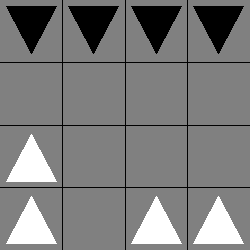

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(4,1),(3,1)


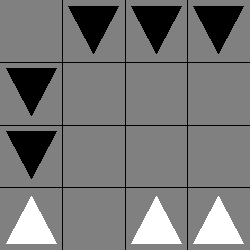

O jogo não acabou
(1, 4) (2, 4)
O jogo não acabou


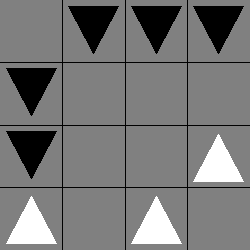

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(4,4),(3,4)


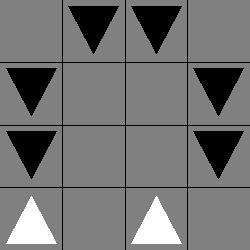

O jogo não acabou
(1, 1) (2, 2)


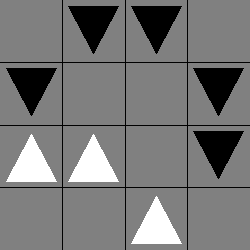

O jogo não acabou


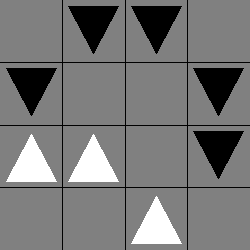

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(2,4),(2,3)


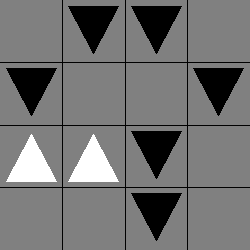

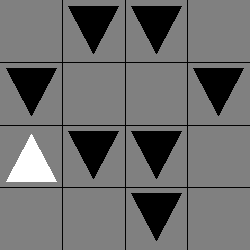

O jogo não acabou
(2, 1) (3, 2)


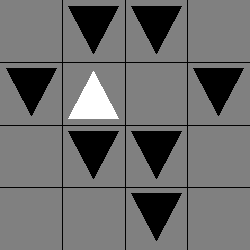

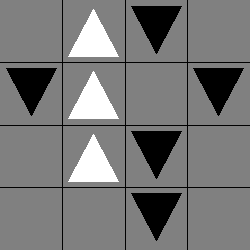

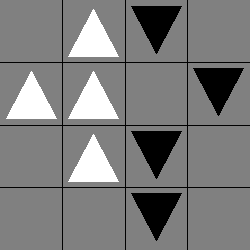

O jogo não acabou


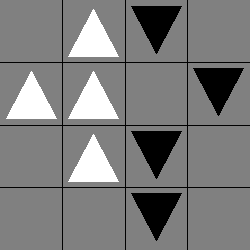

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(2,3),(3,3)


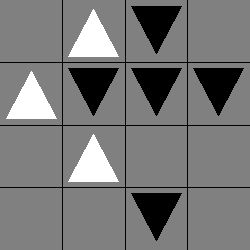

O jogo não acabou
(3, 1) (4, 1)
O jogo não acabou


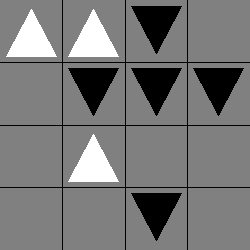

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(3,2),(3,1)


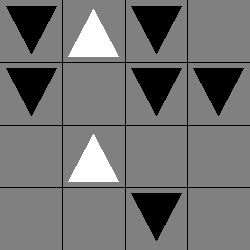

O jogo não acabou
(2, 2) (3, 2)


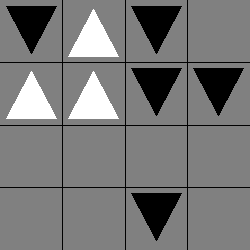

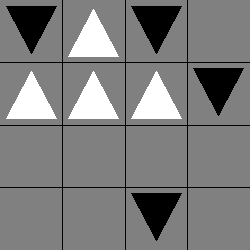

O jogo não acabou


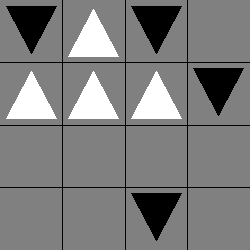

Jogue no formato '(origemLine, origemColumn), (destinoLine, destinoColumn)' 
(3,1),(2,3)


ValueError: ignored

In [ ]:
## Agora vamos colocar o jogador para jogar contra um humano.
_, history = game(player, human_player)

## Desenhando Histórico

Criamos anteriormente uma função que mostra uma sequência de **Images** na tela. Agora precisamos de uma função que cria esses objetos **Image**. A função que faz isso deverá percorrer o histórico e fazer as chamadas a **draw_board** de maneira adequada, nada muito complicado comparado com o que já conseguimos evoluir.

In [ ]:
## O parâmetro flip_black_board será usado mais adiante.
def generate_image_history(history, flip_black_board = False) :
    image_history = []
    lines, columns = history[0]

    for i in range(1, len(history)) :
        white_positions, black_positions = history[i]
        if ( flip_black_board and (i % 2 == 1) ) :
            lines, columns, white_positions, black_positions = flip_board(lines, columns, white_positions, black_positions)
        image_history.append( draw_board(lines, columns, white_positions, black_positions ) )
    return image_history

In [ ]:
history

from IPython.display import display # para mostrar imagens
from PIL import Image, ImageDraw    # para ler imagens

def draw_board(lines, columns,white_positions, black_positions) :
    board = Image.new('RGB', (250,250),  "gray") #Tamanho e a cor do tabuleiro.
    draw  = ImageDraw.Draw(board)
    
    ## Linhas e Colunas
    shift_lines = float(board.size[0])/lines    
    for el in range(lines) :
      #Desenhando linhas na Horizontal
        draw.line( (0, shift_lines *(el+1), board.size[0], shift_lines*(el+1)), fill = "black" )  
        
    ## Linhas e Colunas
    shift_columns = float(board.size[1])/columns
    for el in range(columns) :
      #Desenhando Linhas na Vertical
        draw.line( (shift_columns*(el+1), 0, shift_columns*(el+1), board.size[1]), fill = "black" )  #Linhas na Vertical
    
    ## Peças
    for el in black_positions :
        x, y = lines-el[0]+1, el[1]
        draw.polygon([(shift_columns*(y-0.9),shift_lines*(x-0.9)), 
                      (shift_column

**Conduzindo as Peças Pretas - Virando o Tabuleiro**

A função flip-board recebe um tabuleiro como parâmetro e devolve este tabuleiro rotacionado. Dessa forma, é possível movimentar o jogo.




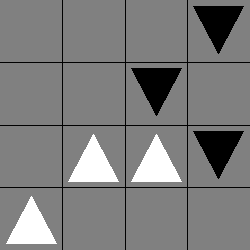

---


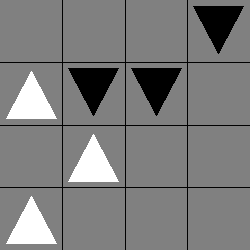

In [ ]:
def flip_board(lines, columns, white_positions, black_positions) :
    new_white = []
    new_black = []
    
    for coord in black_positions :
        new_white.append(
            ( lines-coord[0]+1, columns-coord[1]+1)
        )
    for coord in white_positions :
        new_black.append(
            ( lines-coord[0]+1, columns-coord[1]+1)
        )
    return lines, columns, tuple(new_white), tuple(new_black)
  
tabuleiro = [ 4,4,((1,1),(2,2),(2,3)), ((3,3),(4,4),(2,4)) ]
display(draw_board(*tabuleiro))
print("---")
flipped   = flip_board(*tabuleiro)
display(draw_board(*flipped))